### R Kernel installation
1. In R:
```
install.packages('IRkernel')
IRkernel::installspec()
```
2. Restart jupyter.

### Config

In [1]:
repo_path <- "D:/studia/iml-projekt"

In [12]:
# Required packages
library("data.table")
library("DALEX")
library("DALEXtra")

# Jupyter settings
options(repr.plot.width = 12)
options(repr.plot.height = 8)
options(jupyter.rich_display = FALSE)
options(width = 120)

# Paths within the repo
data_path <- file.path(repo_path, "data/survival-data-split")
model_path <- file.path(repo_path, "models/pickles/extra_trees.pickle")

### Reading data and creating explainer

In [3]:
read_data <- function(data_dir) {
    data_names <- c("X_test", "X_train","y_test", "y_train")
    file_names <- sprintf("survival_%s.csv", data_names)
    paths <- file.path(data_dir, file_names)
    
    setNames(lapply(paths, fread), data_names)
}

In [32]:
data <- read_data(data_path)
explainer <- explain_scikitlearn(
    model_path,
    data = data$X_train,
    y = data$y_train,
    label = "ExtraTreesClassifier"
)

Preparation of a new explainer is initiated
  -> model label       :  ExtraTreesClassifier 
  -> data              :  754  rows  12  cols 
  -> target variable   :  Argument 'y' was a data frame. Converted to a vector. (  WARNING  )
  -> target variable   :  754  values 
  -> model_info        :  package reticulate , ver. 1.15 , task classification (  default  ) 
  -> predict function  :  yhat.scikitlearn_model  will be used (  default  )
  -> predicted values  :  numerical, min =  0.16271 , mean =  0.4905682 , max =  0.8673546  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.8246962 , mean =  0.0001479711 , max =  0.7968795  
  A new explainer has been created!  


In [33]:
vi <- variable_importance(explainer)

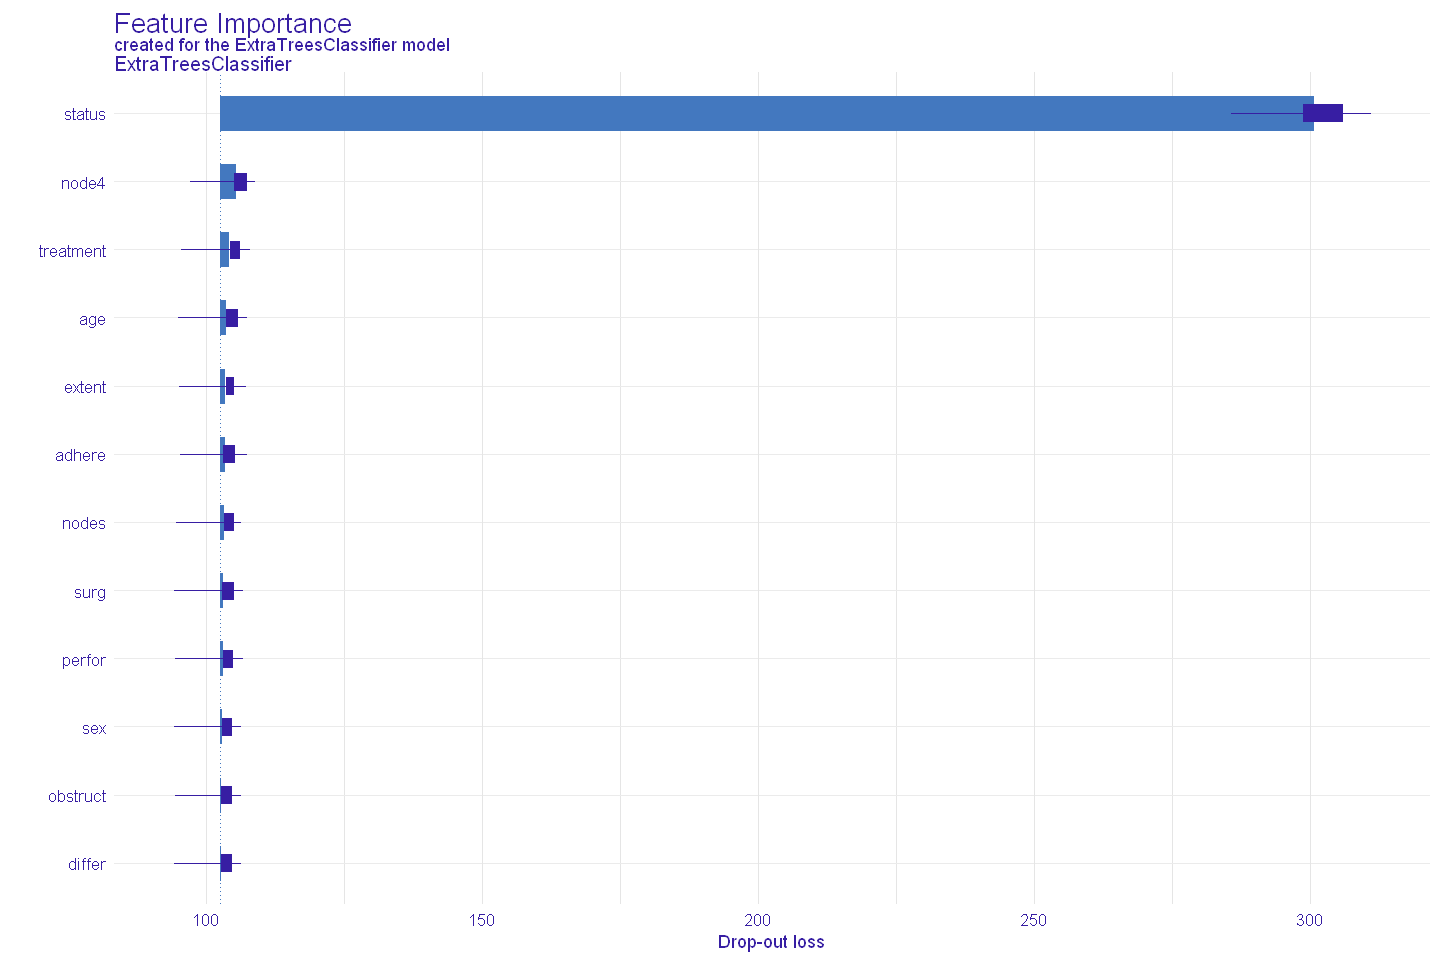

In [34]:
plot(vi)

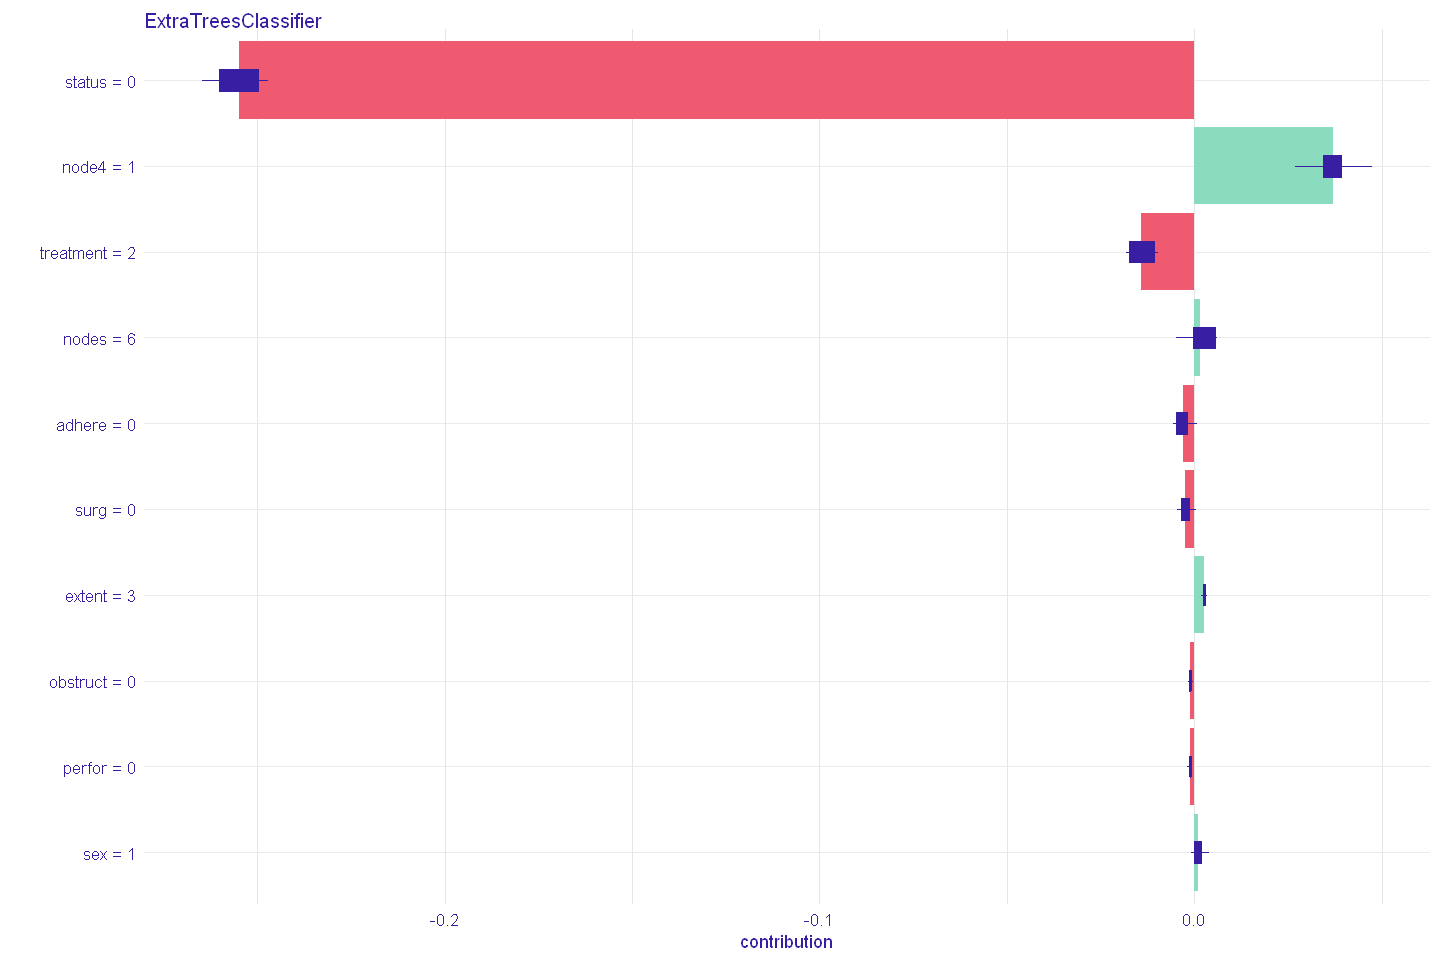

In [69]:
plot(
    variable_attribution(explainer, data$X_test[1], type = "shap", keep_distributions = TRUE),
    plot_distributions = TRUE
)

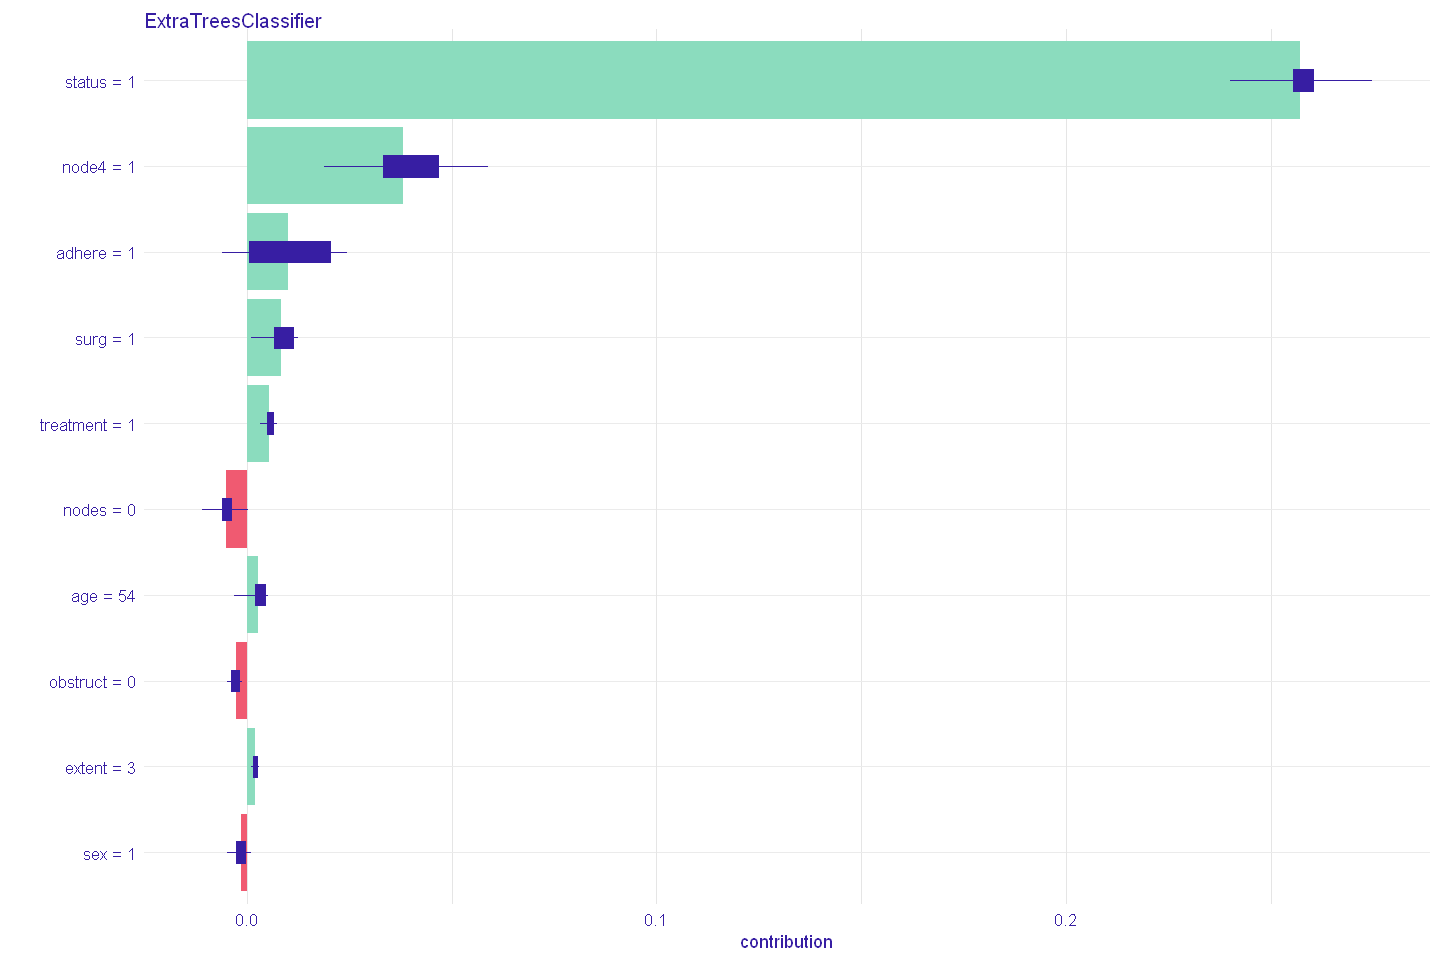

In [70]:
plot(
    variable_attribution(explainer, data$X_test[11], type = "shap", keep_distributions = TRUE),
    plot_distributions = TRUE
)

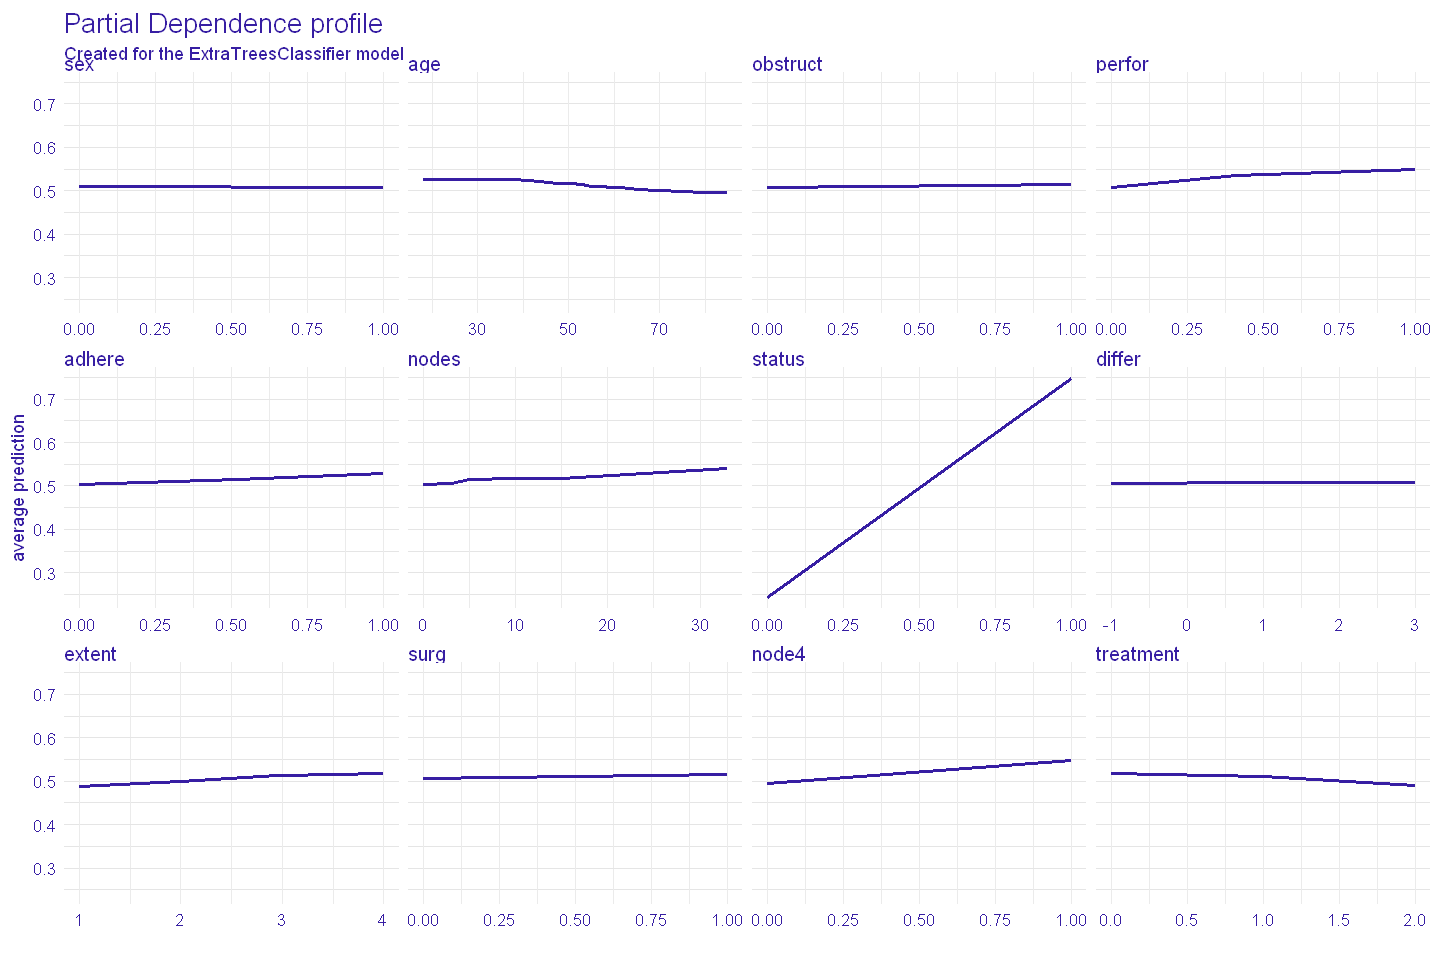

In [45]:
plot(variable_profile({e <- explainer; e$data <- as.data.frame(e$data); e }))